In [4]:
import json

In [16]:
with open('clean_corpus') as file:
  corpus = json.load(file)
  

In [18]:
for i in range(len(corpus)):
    corpus[i]['text'] = corpus[i]['text'].split()

In [9]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luigi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words("russian")


In [45]:
keywords = []
for i in range(len(corpus)):
    for j in range(len(corpus[i]['POS'])):
        if corpus[i]['POS'][j] == 'NOUN':
            keywords.append((corpus[i]['text'][j], 'text' + str(i)))
            

In [46]:
clean_keywords = []
for i in range(len(keywords)):
    if keywords[i][0] not in stopwords_list:
        clean_keywords.append(keywords[i])
    

In [40]:
import pymorphy2
analyzer = pymorphy2.MorphAnalyzer()

In [48]:
keywords = []
for i in range(len(clean_keywords)):
    parsed_word = analyzer.parse(clean_keywords[i][0])[0]
    if parsed_word.tag.POS == 'NOUN':
        keywords.append((parsed_word.normal_form, clean_keywords[i][1]))

In [49]:
keywords[0:50]


[('внешность', 'text0'),
 ('принадлежность', 'text0'),
 ('иисус', 'text0'),
 ('христос', 'text0'),
 ('существование', 'text0'),
 ('христианство', 'text0'),
 ('завет', 'text0'),
 ('век', 'text0'),
 ('принадлежность', 'text0'),
 ('дебаты', 'text0'),
 ('век', 'text0'),
 ('ряд', 'text0'),
 ('документ', 'text0'),
 ('человек', 'text0'),
 ('представление', 'text0'),
 ('изображение', 'text0'),
 ('борода', 'text0'),
 ('исследование', 'text0'),
 ('основа', 'text0'),
 ('источник', 'text0'),
 ('век', 'text0'),
 ('мнение', 'text0'),
 ('тенденция', 'text0'),
 ('гибель', 'text1'),
 ('ребёнок', 'text1'),
 ('красноярск', 'text1'),
 ('смерть', 'text1'),
 ('группа', 'text1'),
 ('школьник', 'text1'),
 ('красноярск', 'text1'),
 ('год', 'text1'),
 ('мальчик', 'text1'),
 ('возраст', 'text1'),
 ('апрель', 'text1'),
 ('май', 'text1'),
 ('коллектор', 'text1'),
 ('дело', 'text1'),
 ('убийство', 'text1'),
 ('орган', 'text1'),
 ('срок', 'text1'),
 ('расследование', 'text1'),
 ('год', 'text1'),
 ('день', 'text1'),


In [ ]:
from nltk.probability import FreqDist


In [62]:
fdist = FreqDist()
for pair in keywords:
    fdist[pair[0]] += 1
common_kw = fdist.most_common(50)
print(common_kw)

[('год', 189), ('человек', 43), ('существо', 37), ('время', 33), ('дело', 30), ('убийство', 26), ('смерть', 25), ('имя', 24), ('исчезновение', 23), ('расследование', 22), ('ребёнок', 20), ('июль', 20), ('животное', 20), ('январь', 20), ('сша', 19), ('группа', 18), ('август', 18), ('век', 16), ('название', 16), ('тело', 16), ('псевдоним', 16), ('март', 16), ('октябрь', 16), ('июнь', 15), ('личность', 14), ('город', 14), ('апрель', 13), ('обстоятельство', 13), ('автор', 13), ('декабрь', 13), ('история', 13), ('мальчик', 12), ('фотография', 12), ('девочка', 12), ('родитель', 12), ('происшествие', 11), ('инцидент', 11), ('происхождение', 11), ('причина', 11), ('событие', 11), ('февраль', 11), ('зверь', 11), ('часть', 11), ('ноябрь', 11), ('ряд', 10), ('май', 10), ('день', 10), ('сообщение', 10), ('конец', 10), ('версия', 10)]


In [63]:
kw = []
clean_keywords = []
for key in common_kw:
    kw.append(key[0])
for i in range(len(keywords)):
    if keywords[i][0] in kw:
        clean_keywords.append(keywords[i])
        

In [64]:
print(len(clean_keywords))
keywords = clean_keywords

998


In [53]:
import sqlite3

In [65]:
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE keywords (word, text_id);")

con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE keywords (word, text_id);")
cur.executemany("INSERT INTO keywords (word, text_id) "
                "VALUES (?, ?);",
                keywords)
con.commit()
sql1 = "SELECT word, " \
       "COUNT(word) AS cnt " \
       "FROM keywords " \
       "GROUP BY word " \
       "ORDER BY cnt " \
       "DESC;"
cur.execute(sql1)
to_print = cur.fetchall()
uniq_words = []
pairs = []
for row in to_print:
    uniq_words.append(row[0])

print("All keywords:", len(keywords))
print("Unique keywords:", len(uniq_words))


All keywords: 998
Unique keywords: 50


In [66]:
sql2 = "SELECT a.word a, b.word b, " \
       "COUNT(*) cnt " \
       "FROM keywords a " \
       "JOIN keywords b " \
       "ON b.text_id = a.text_id AND b.word > a.word " \
       "GROUP BY a.word, b.word " \
       "ORDER BY cnt " \
       "DESC;"
cur.execute(sql2)
occ = cur.fetchall()


weighted_pairs = []

for row in occ:
    weighted_pairs.append((row[0], row[1], row[2]))

for i in range(0,15):
  print(i, weighted_pairs[i])

0 ('год', 'убийство', 71)
1 ('год', 'дело', 59)
2 ('год', 'человек', 52)
3 ('год', 'сша', 47)
4 ('год', 'исчезновение', 44)
5 ('год', 'ребёнок', 43)
6 ('год', 'январь', 42)
7 ('время', 'год', 39)
8 ('год', 'октябрь', 38)
9 ('год', 'существо', 36)
10 ('год', 'имя', 35)
11 ('август', 'год', 31)
12 ('год', 'ряд', 31)
13 ('год', 'смерть', 31)
14 ('название', 'существо', 30)


In [72]:
for w_pair in weighted_pairs:
    if w_pair[2] < 2:
        weighted_pairs.remove(w_pair)

In [57]:
import networkx as nx


In [73]:
G = nx.Graph()
G.add_weighted_edges_from(weighted_pairs)
nx.write_gexf(G, 'cryptids.gexf')


In [74]:
print(nx.info(G))
density = nx.density(G)
print("Network density:", density)
if nx.is_connected(G):
    print("Connectivity: True")
    print("Network diameter: ", nx.diameter(G))
else:
    print("Connectivity: False")


Name: 
Type: Graph
Number of nodes: 50
Number of edges: 616
Average degree:  24.6400
Network density: 0.5028571428571429
Connectivity: True
Network diameter:  2


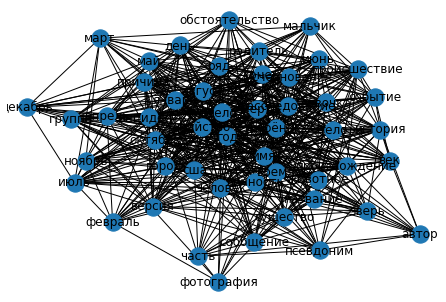

In [75]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)
plt.show()